<a href="https://colab.research.google.com/github/siming-deng/cis3120/blob/main/cis3120_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing necessary libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
import json
import time

In [2]:
# list of urls for scraping
urls = ['https://companiesmarketcap.com/usa/largest-companies-in-the-usa-by-market-cap/',
        'https://companiesmarketcap.com/china/largest-companies-in-china-by-market-cap/',
        'https://companiesmarketcap.com/hong-kong/largest-companies-in-hong-kong-by-market-cap/']

# lists to store the values
names = []
symbols = []
prices =[]

# loop over the urls and scrape each page
for url in urls:
  # request the html and parse them
  page = requests.get(url)
  soup = BeautifulSoup(page.content, 'html.parser')
  # finding the table and rows
  table = soup.find_all('table', class_='table marketcap-table dataTable')
  rows = table[0].find_all('tr')

  # loop over the first 30 rows
  for row in rows[0:31]:
    cells = row.find_all('td')
    if len(cells) == 7:
      # getting the name, symbol, and proce from the raw html and store them to the lists
      ns = cells[1].get_text().strip().rsplit('\n')
      names.append(ns[0])
      symbols.append(ns[-1])
      price = cells[3].get_text().lstrip('$').rsplit('\n')
      prices.append(float(price[0].replace(',','')))

# creating series for dataframe
stocks_data = {
    'Symbol': symbols,
    'Company Name': names,
    'Price($)': prices
}

# create the dataframe
all_stocks_df = pd.DataFrame(stocks_data)


In [3]:
# display the data frame
all_stocks_df

,Symbol,Company Name,Price($)
0,AAPL,Apple,170.33
1,MSFT,Microsoft,308.26
2,GOOG,Alphabet (Google),2666.00
3,AMZN,Amazon,2880.00
4,TSLA,Tesla,846.35
...,...,...,...
85,H78.SI,Hongkong Land,5.47
86,0004.HK,Wharf Holdings,3.47
87,6823.HK,Hong Kong Telecom,1.36
88,0017.HK,New World Development Company,4.06


In [4]:
# lists to store values from the yahoo finance
market = []
shares = []
marketCap = []
fifty_avg_price = []
fifty_avg_change = []
fiftytwo_high_change = []
fiftytwo_low_change = []
fiftytwo_range = []

# for each symbol, obtain the required information from yahoo finance API
for symbol in symbols:
  headers = {
    'x-api-key': 'H60h3saO5b2KiFy6JzvSbcas0GXX1s71lCOF4G8j'
  }

  querys = {
    'symbols' : symbol
  }
  # requesting to get the data from yahoo finance API
  url = 'https://yfapi.net/v6/finance/quote'
  response = requests.request('GET', url, headers = headers, params = querys)

  if response.status_code == 200:
    # convert to json
    data = response.json()
    # append the needed information to the lists
    market.append(data['quoteResponse']['result'][0]['market'])
    shares.append(data['quoteResponse']['result'][0]['sharesOutstanding'])
    marketCap.append(data['quoteResponse']['result'][0]['marketCap'])
    fifty_avg_price.append(data['quoteResponse']['result'][0]['fiftyDayAverage'])
    fifty_avg_change.append(data['quoteResponse']['result'][0]['fiftyDayAverageChange'])
    fiftytwo_high_change.append(data['quoteResponse']['result'][0]['fiftyTwoWeekHighChangePercent'])
    fiftytwo_low_change.append(data['quoteResponse']['result'][0]['fiftyTwoWeekLowChangePercent'])
    fiftytwo_range.append(data['quoteResponse']['result'][0]['fiftyTwoWeekRange'])
    time.sleep(1)
  else:
    # if failed, print this message
    print("API request failed.")
    break

# a series for yahoo data frame
yahoo_data = {
    'Symbol': symbols,
    'Market': market,
    'Shares Oustanding': shares,
    'Market Capitalization': marketCap,
    '50 Day Average Price': fifty_avg_price,
    '50 Day Average Change': fifty_avg_change,
    '52 Week High Change Percent': fiftytwo_high_change,
    '52 Week Low Change Percent': fiftytwo_low_change,
    '52 Week Range': fiftytwo_range
}

# create the yahoo dataframe
yahoo_df = pd.DataFrame(yahoo_data)

In [5]:
# display the data frame
yahoo_df

,Symbol,Market,Shares Oustanding,Market Capitalization,50 Day Average Price,50 Day Average Change,52 Week High Change Percent,52 Week Low Change Percent,52 Week Range
0,AAPL,us_market,16334399488,2782238343168,169.1982,1.131805,-0.068930,0.465709,116.21 - 182.94
1,MSFT,us_market,7496869888,2310985220096,325.0540,-16.793976,-0.118426,0.374565,224.26 - 349.67
2,GOOG,us_market,317737984,1769881862144,2850.7750,-184.984860,-0.122229,0.440244,1850.93 - 3037.0
3,AMZN,us_market,507148000,1460363067392,3345.3870,-465.826900,-0.236814,0.063730,2707.04 - 3773.08
4,TSLA,us_market,1004259968,849955389440,1039.1726,-192.822630,-0.319375,0.568796,539.49 - 1243.49
...,...,...,...,...,...,...,...,...,...
85,H78.SI,sg_market,2292349952,12539153408,5.4216,0.048400,-0.056897,0.324455,4.13 - 5.8
86,0004.HK,hk_market,3056029952,82665611264,25.2440,1.806000,-0.118893,0.613962,16.76 - 30.7
87,6823.HK,hk_market,7575739904,80151330816,10.5744,0.005600,-0.083189,0.047525,10.1 - 11.54
88,0017.HK,hk_market,2516630016,79651340288,30.9890,0.660999,-0.263954,0.080205,29.3 - 43.0


In [6]:
# merge the two data frames horizontally
merged_df = pd.merge(all_stocks_df, yahoo_df, on = ['Symbol'] , how = 'left')

# display the merged data frame
merged_df

,Symbol,Company Name,Price($),Market,Shares Oustanding,Market Capitalization,50 Day Average Price,50 Day Average Change,52 Week High Change Percent,52 Week Low Change Percent,52 Week Range
0,AAPL,Apple,170.33,us_market,16334399488,2782238343168,169.1982,1.131805,-0.068930,0.465709,116.21 - 182.94
1,MSFT,Microsoft,308.26,us_market,7496869888,2310985220096,325.0540,-16.793976,-0.118426,0.374565,224.26 - 349.67
2,GOOG,Alphabet (Google),2666.00,us_market,317737984,1769881862144,2850.7750,-184.984860,-0.122229,0.440244,1850.93 - 3037.0
3,AMZN,Amazon,2880.00,us_market,507148000,1460363067392,3345.3870,-465.826900,-0.236814,0.063730,2707.04 - 3773.08
4,TSLA,Tesla,846.35,us_market,1004259968,849955389440,1039.1726,-192.822630,-0.319375,0.568796,539.49 - 1243.49
...,...,...,...,...,...,...,...,...,...,...,...
85,H78.SI,Hongkong Land,5.47,sg_market,2292349952,12539153408,5.4216,0.048400,-0.056897,0.324455,4.13 - 5.8
86,0004.HK,Wharf Holdings,3.47,hk_market,3056029952,82665611264,25.2440,1.806000,-0.118893,0.613962,16.76 - 30.7
87,6823.HK,Hong Kong Telecom,1.36,hk_market,7575739904,80151330816,10.5744,0.005600,-0.083189,0.047525,10.1 - 11.54
88,0017.HK,New World Development Company,4.06,hk_market,2516630016,79651340288,30.9890,0.660999,-0.263954,0.080205,29.3 - 43.0


In [7]:
# ordered the data frame based on market capitalization
marketCap_sorted_merged_df = merged_df.sort_values(by = 'Market Capitalization', ascending = False)

# getting only the first 10 rows of the sorted data frame
marketCap_sorted_merged_df.head(10)

,Symbol,Company Name,Price($),Market,Shares Oustanding,Market Capitalization,50 Day Average Price,50 Day Average Change,52 Week High Change Percent,52 Week Low Change Percent,52 Week Range
0,AAPL,Apple,170.33,us_market,16334399488,2782238343168,169.1982,1.131805,-0.068930,0.465709,116.21 - 182.94
31,600519.SS,Kweichow Moutai,296.53,cn_market,1256199936,2370449178624,1994.4126,-107.412600,-0.281931,0.236971,1525.5 - 2627.88
1,MSFT,Microsoft,308.26,us_market,7496869888,2310985220096,325.0540,-16.793976,-0.118426,0.374565,224.26 - 349.67
33,1398.HK,ICBC,0.60,hk_market,86794002432,1951508332544,4.4396,0.240400,-0.186087,0.147059,4.08 - 5.75
2,GOOG,Alphabet (Google),2666.00,us_market,317737984,1769881862144,2850.7750,-184.984860,-0.122229,0.440244,1850.93 - 3037.0
35,3968.HK,CM Bank,8.35,hk_market,4590900224,1540188930048,63.4040,1.646004,-0.102139,0.171017,55.55 - 72.45
3,AMZN,Amazon,2880.00,us_market,507148000,1460363067392,3345.3870,-465.826900,-0.236814,0.063730,2707.04 - 3773.08
34,300750.SZ,CATL,93.12,cn_market,2330850048,1381261639680,610.1404,-17.540405,-0.143642,1.116051,280.05 - 692.0
41,0941.HK,China Mobile,6.74,hk_market,20475500544,1075987546112,48.3430,4.207001,-0.112331,0.144880,45.9 - 59.2
4,TSLA,Tesla,846.35,us_market,1004259968,849955389440,1039.1726,-192.822630,-0.319375,0.568796,539.49 - 1243.49


In [8]:
# getting float numbers 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# display the statistical calculations
merged_df.describe()

,Price($),Shares Oustanding,Market Capitalization,50 Day Average Price,50 Day Average Change,52 Week High Change Percent,52 Week Low Change Percent
count,90.00,90.00,90.00,90.00,90.00,90.00,90.00
mean,5369.09,7423122859.76,434173691869.87,5186.14,231.07,-0.19,0.27
std,49515.71,14634832543.01,533453176111.88,47181.34,2330.91,0.14,0.26
min,0.38,619938.00,12539153408.00,0.36,-465.83,-0.75,0.01
25%,6.20,1779194944.00,135645728768.00,27.26,-6.06,-0.27,0.12
50%,28.72,2990050048.00,251479375872.00,58.94,0.03,-0.15,0.20
75%,137.82,6788427520.00,442047913984.00,168.52,1.56,-0.09,0.35
max,469880.00,86794002432.00,2782238343168.00,447788.50,22091.50,-0.00,1.85


In [9]:
# saved to a csv file
marketCap_sorted_merged_df.to_csv('Top US, China, and Hong Kong Market stocks by Market Capitalization.csv', index = False)

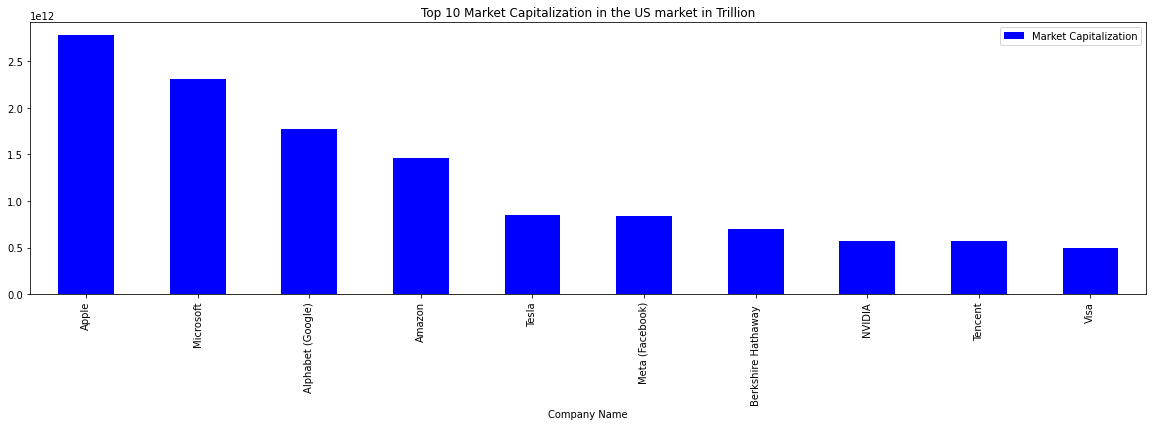

In [10]:
# a function to graph bar chart
def graph(market, region, color):
  filter_mask = merged_df['Market'] == market
  merged_df[filter_mask].sort_values(by = 'Market Capitalization', ascending = False).head(10).plot(x = 'Company Name', y = 'Market Capitalization', title = f'Top 10 Market Capitalization in the {region} market in Trillion', kind = 'bar', color = color, figsize = (20,5))

# graphing the top us market cap
graph('us_market', 'US', 'blue')

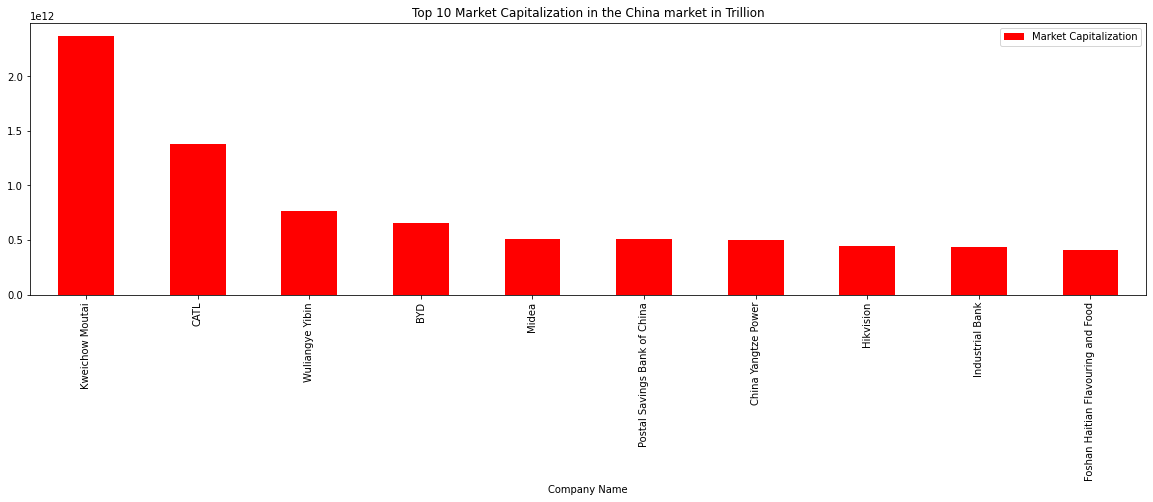

In [11]:
# bar graph for the top china market cap
graph('cn_market', 'China', 'red')

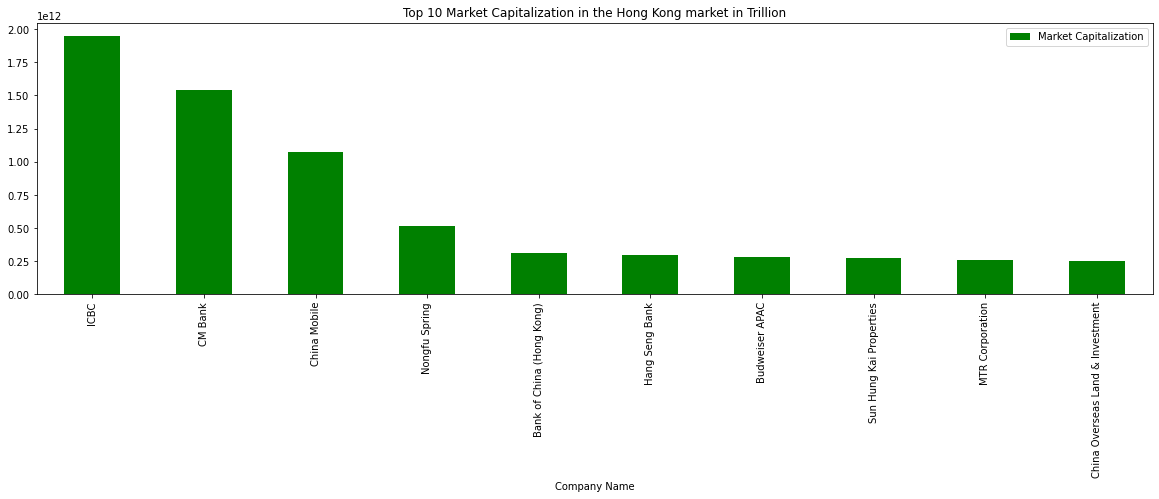

In [12]:
# bar graph for the top hong kong market cap
graph('hk_market', 'Hong Kong', 'green')

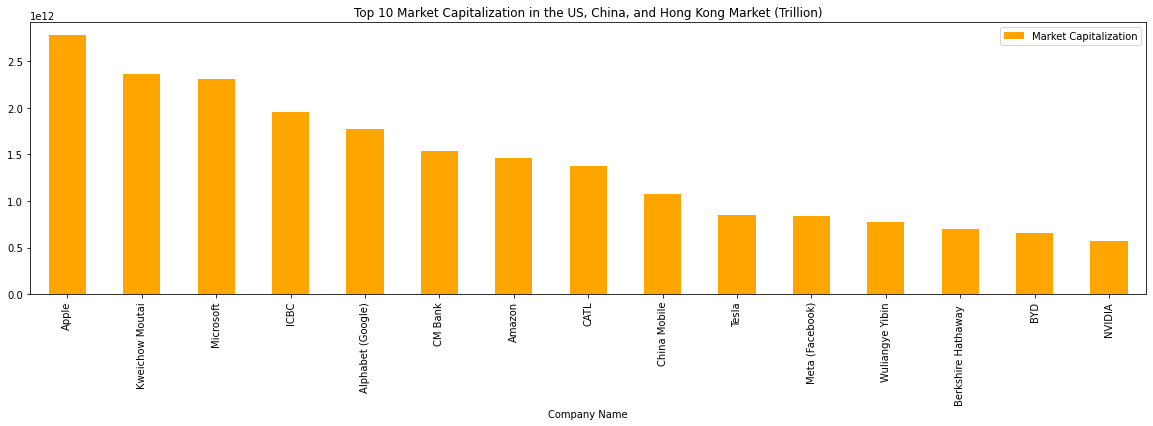

In [13]:
# bar graph for the market cap of all 3 markets
filter_mask = (merged_df['Market'] == 'us_market') | (merged_df['Market'] == 'cn_market') | (merged_df['Market'] == 'hk_market')
merged_df[filter_mask].sort_values(by = 'Market Capitalization', ascending = False).head(15).plot(x = 'Company Name', y = 'Market Capitalization', title = f'Top 10 Market Capitalization in the US, China, and Hong Kong Market (Trillion)', kind = 'bar', color = 'orange', figsize = (20,5))
